In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [179]:
df = pd.read_csv("../../datasets/Linear Regression - Sheet1.csv")
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


A very simple dataset do understand the linear regression

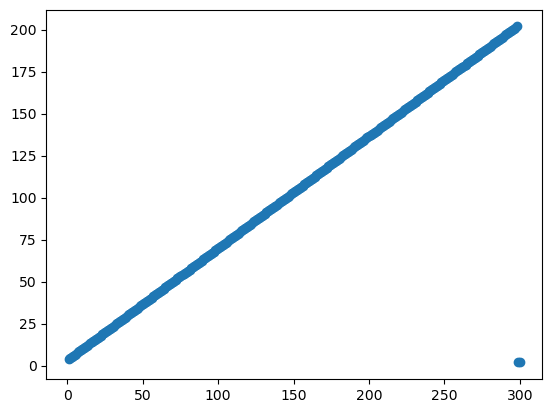

In [180]:
# Visualize the data
plt.scatter(df["X"], df["Y"])

In [181]:
def split_data(data_frame):
    training, validation, test = np.split(data_frame.sample(frac=1), [int(0.7*len(data_frame)), int(0.8*len(data_frame))])
    return training, validation, test

In [182]:
def get_xy(data_sample):
    x, y = data_sample["X"], data_sample["Y"]
    x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)
    return x, y

In [183]:
train, val, test = split_data(df)

In [184]:
x_train, y_train = get_xy(train)
x_val, y_val = get_xy(val)
x_test, y_test = get_xy(test)

Linear Regression Model

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [187]:
linear_model.coef_, linear_model.intercept_

(array([[0.64835646]]), array([5.00665899]))

In [188]:
linearModelTestPrediction = linear_model.predict(x_test)
r2_score(y_test, linearModelTestPrediction), mean_squared_error(y_test, linearModelTestPrediction)

(0.773614713687672, 653.6679780843338)

According to the metrics, the model has a good consistency and prediction power.
Lets check the graph then

In [189]:
# Function for comparation
def plotRealVsPredicted(xlabel, predicted, real, ax=None):
    plt.scatter(xlabel, real, color="blue", label="Real data")
    plt.plot(xlabel, predicted, color="red", label="Predicted")
    plt.legend()
    plt.show()

In [190]:
x_label, y_label = get_xy(df)

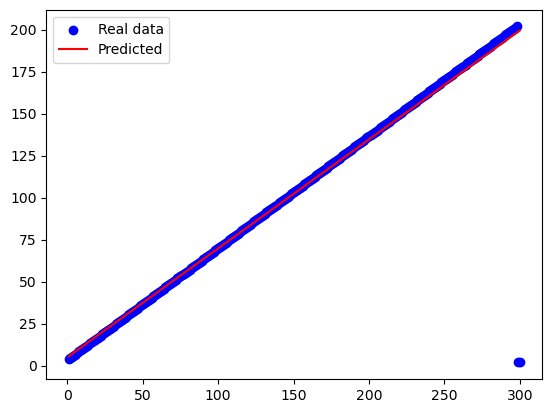

In [191]:
predictions = linear_model.predict(x_label)
plotRealVsPredicted(x_label, predictions, y_label)

# Regression with Neural Network

In [192]:
from tensorflow import keras

First we are gonna create a neural net with a single layer

In [193]:
# Layer for normalization
normalizer = keras.layers.Normalization(input_shape=(1, ), axis=None)
normalizer.adapt(x_label)

In [194]:
singleLayerModel = keras.Sequential([
    normalizer,
    keras.layers.Dense(units=1)
])

In [195]:
singleLayerModel.compile(keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

In [196]:
history = singleLayerModel.fit(x_train, y_train, epochs=500, validation_data=(x_val, y_val), verbose=0)

In [197]:
# Function from tensorflow's site for visualizing the history
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

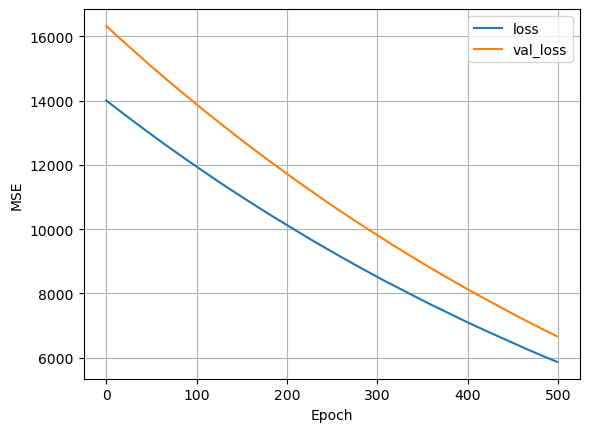

In [198]:
plot_loss(history=history)

In [199]:
singleLayerTestPrediction = singleLayerModel.predict(x_test)
r2_score(y_test, singleLayerTestPrediction), mean_squared_error(y_test, singleLayerTestPrediction)

2/2 [==============================] - 0s 2ms/step


(-0.8733211984937697, 5409.05330054244)

Not a very good score, but lets check the graph for more clear view

10/10 [==============================] - 0s 903us/step


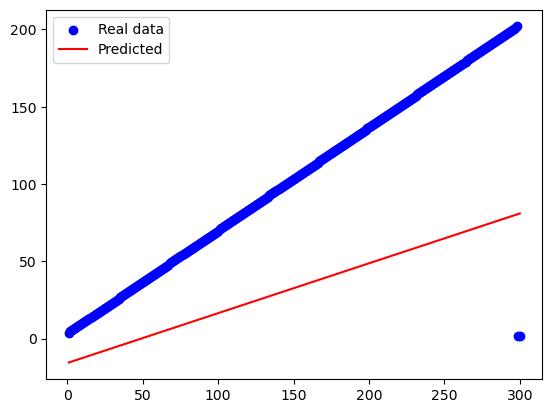

In [200]:
predictions = singleLayerModel.predict(x_label)
plotRealVsPredicted(x_label, predictions, y_label)

Now we gonna use a model with more layers

In [201]:
# After some tests this was the best configuration that I found
model = keras.Sequential([
    normalizer,
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1, activation='relu')
])

In [202]:
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

In [203]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=0)

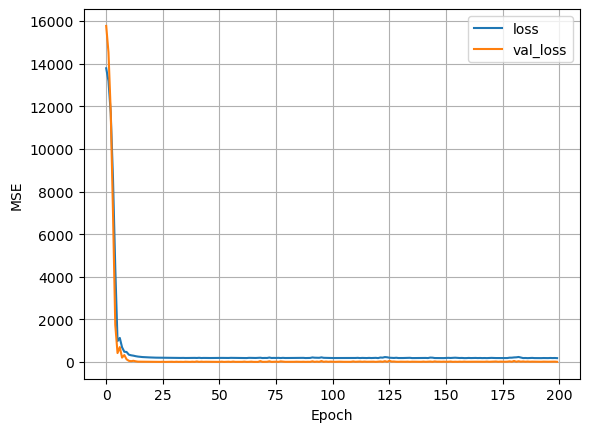

In [204]:
plot_loss(history)

In [205]:
modelTestPrediction = model.predict(x_test)
r2_score(y_test, modelTestPrediction), mean_squared_error(y_test, modelTestPrediction)

2/2 [==============================] - 0s 1ms/step


(0.7857530979904488, 618.6194409039621)

Better than the previus one but apparently the LinearRegression model is still the best.
Lets check the graph anyway

 1/10 [==>...........................] - ETA: 0s

10/10 [==============================] - 0s 968us/step


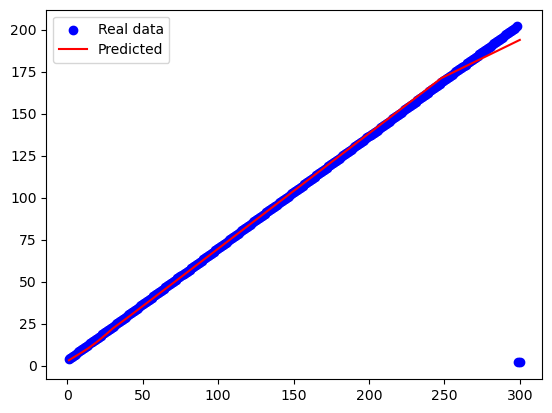

In [206]:
predictions = model.predict(x_label)
plotRealVsPredicted(x_label, predictions, y_label)

Lets compare the three models

In [207]:
FirstModelPredictions = linear_model.predict(x_label)
SecondModelPredictions = singleLayerModel.predict(x_label)
ThirdModelPredictions = model.predict(x_label)

10/10 [==============================] - 0s 783us/step


In [208]:
FirstModelR2 = r2_score(y_label, FirstModelPredictions)
FirstModelMSE = mean_squared_error(y_label, FirstModelPredictions)

SecondModelR2 = r2_score(y_label, SecondModelPredictions)
SecondModelMSE = mean_squared_error(y_label, SecondModelPredictions)

ThirdModelR2 = r2_score(y_label, ThirdModelPredictions)
ThirdModelMSE = mean_squared_error(y_label, ThirdModelPredictions)

In [209]:
print(f"R2 Score: {FirstModelR2} and Mean Squared Error {FirstModelMSE} | Model: Linear Regressor")
print(f"R2 Score: {SecondModelR2} and Mean Squared Error {SecondModelMSE} | Model: Single Layer Neural Net")
print(f"R2 Score: {ThirdModelR2} and Mean Squared Error {ThirdModelMSE} | Model: Deep Neural Net")

R2 Score: 0.9211654186056131 and Mean Squared Error 262.8838939088322 | Model: Linear Regressor
R2 Score: -0.7542436946561033 and Mean Squared Error 5849.747726941668 | Model: Single Layer Neural Net
R2 Score: 0.9249205407320034 and Mean Squared Error 250.36196369460052 | Model: Deep Neural Net


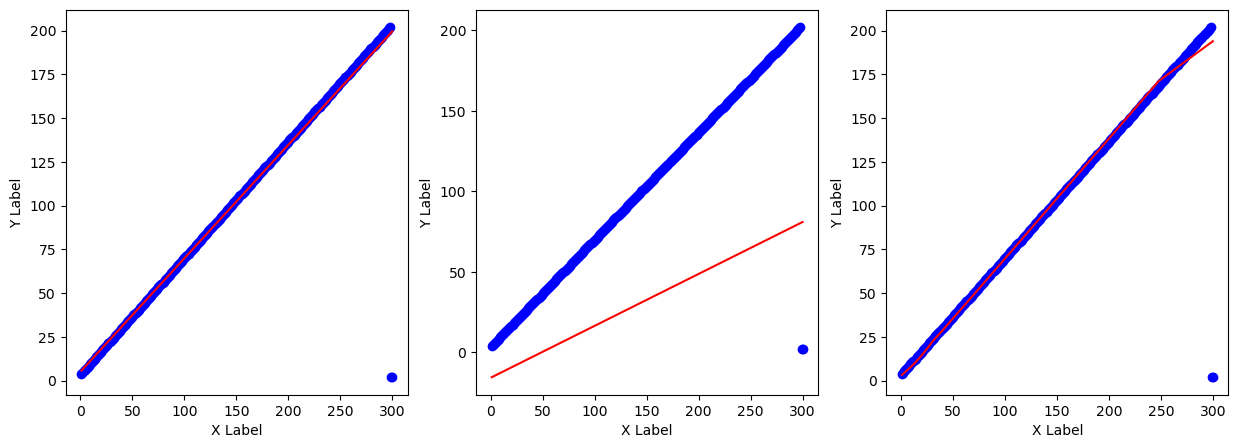

In [236]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):
    axes[i].scatter(x_label, y_label, color='blue', label='Real')
    axes[i].set_xlabel("X Label")
    axes[i].set_ylabel("Y Label")

# axes[0].title("FirstModel")
# axes[1].title("SecondModel")
# axes[2].title("ThirdModel")

axes[0].plot(x_label, FirstModelPredictions, color='red', label='Predicted')
axes[1].plot(x_label, SecondModelPredictions, color='red', label='Predicted')
axes[2].plot(x_label, ThirdModelPredictions, color='red', label='Predicted')